In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#help(warnings.filterwarnings)

In [3]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        
        self.number_feature = layers[0]
        self.number_class = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], 1)))

In [4]:
#Forward propagation
class NeuralNetwork(NeuralNetwork):
    def forwardPass(self, A):
        A = tf.convert_to_tensor(A, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

In [5]:
#We will use this section to calculate loss function and upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A))
    
    def upgrade_parameters(self, lr):
        for i in range(1, self.L):
            self.W[i].assign_sub(lr*self.dw[i])
            self.b[i].assign_sub(lr*self.db[i])

In [6]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A), axis = 1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        
        print ("Number of feature: {}".format(self.number_feature))
        print ("Total number of class is: {}".format(self.number_class))
        
        print ("Hidden layer information is: ")
        for j in range(1, self.L-1):
            print("Layer: {}, Units: {}".format(j, self.layers[j]))
        
        print("Total number of parameters: {}".format(num_params))
            

In [7]:
class NeuralNetwork(NeuralNetwork):
    def training_on_batch(self, x, y, lr):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forwardPass(x)
            loss = self.compute_loss(A, y)
            
        for key in self.W.keys():
            self.dw[key] = tape.gradient(loss, self.W[key])
            self.db[key] = tape.gradient(loss, self.b[key])
            
        del tape
        
        self.upgrade_parameters(lr)
        return loss.numpy()

In [8]:
#Training start
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, lr):
        history = {'val_loss':[],
                  'train_loss':[],
                  'val_acc':[]}
        
        for e in range(0, epochs):
            epochs_loss_train = 0.0
            print("Epochs {}".format(e), end= " | ")
            for i in range(step_per_epochs):
                x_batch = x_train[i*batch_size : (i+1)*batch_size]
                y_batch = y_train[i*batch_size : (i+1)*batch_size]
                batch_loss = self.training_on_batch(x_batch, y_batch, lr)
                epochs_loss_train += batch_loss
                
                if i %int(step_per_epochs/10) == 0:
                    print(end =" . ")
                    
            history['train_loss'].append(epochs_loss_train/step_per_epochs)
            valA = self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test, valA).numpy())
        
            valuePr = self.predict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test, axis = 1) == valuePr.numpy()))
            print("Value Accuracy: ", history['val_acc'][-1])
        
        return history
            

In [9]:
def loadDatasets():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.0
    y_train = tf.keras.utils.to_categorical(y_train)
    x_test  = np.reshape(x_test, (x_test.shape[0], 784))/255.0
    y_test  = tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y Test Data Shape: {}".format(x_test))
    print("Len of Y test Dataset: {}".format(len(y_test[0])))
    print("Unique value is: {}".format(np.argmax(y_test[0])))
    return (x_train, y_train), (x_test, y_test)

def plot_random_sample(x, y, p = None):
    indicies = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    
    if p is None:
        p = y
        
    plt.figure(figsize = (10, 4))
    for i, index in enumerate(indicies):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        
        plt.xlabel(str(p[index]), color = col)
        
    return plt

In [10]:
(x_train, y_train), (x_test, y_test) = loadDatasets()


X Train Datasets Shape: (60000, 784)
Y Test Data Shape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y test Dataset: 10
Unique value is: 7


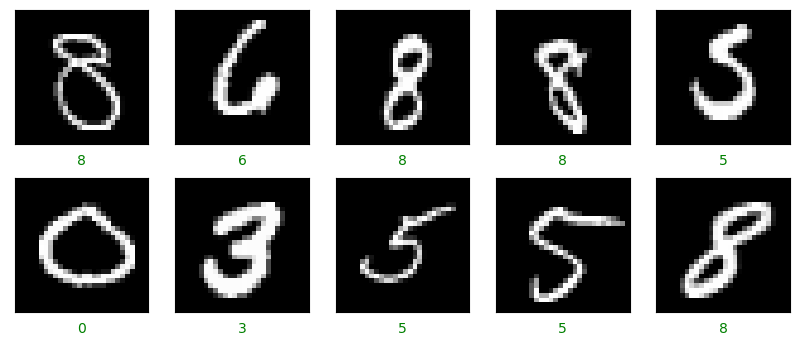

In [11]:
plot_random_sample(x_train, y_train).show()

In [12]:
def plot_results(history):
    plt.figure(figsize=(12,4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [13]:
network = NeuralNetwork([784, 256, 256, 10])

In [14]:
network.info()

Number of feature: 784
Total number of class is: 10
Hidden layer information is: 
Layer: 1, Units: 256
Layer: 2, Units: 256
Total number of parameters: 269322


In [15]:
batch_size = 128
epochs = 10
step_per_epochs = int(x_train.shape[0]/batch_size)

In [16]:
learning_rate = 3e-6

In [ ]:
history = network.train(x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, learning_rate)

Epochs 0 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.112
Epochs 1 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1177
Epochs 2 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1292
Epochs 3 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1424
Epochs 4 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1521
Epochs 5 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1658
Epochs 6 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.1825
Epochs 7 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.2001
Epochs 8 |  .  . 